#build a model that can accurately classify transactions in a given dataset as either fraudulent or non-fraudulent.



In [53]:
#imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Q1) Perform data loading, preprocessing by dropping any rows with 'NaN' values in the 'Class' column

In [54]:
#read folder path
#pwd  = os.getcwd()
#print(pwd)git 

In [55]:
#load the data in data frame  and view first 5 rows

credit_df = pd.read_csv("/home/preethi/Work/GITAIML/credit_Card/creditcard.csv")
print(credit_df.head(5))


# dropping time as not relevant to detect fraud
#credit_df.drop(['Time'],axis=1,inplace=True)
print(credit_df.columns)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [56]:
# describing dataframe
#print(credit_df.describe)
print(credit_df.shape)
print(credit_df.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [57]:
print(credit_df.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [58]:
#drop  naN
dropped_df = credit_df.dropna(subset=['Class'])
print(dropped_df.shape)

(284807, 31)


# Q2) Split the dataset into features (X) and the target variable (y), and further divide into training and test sets. [Consider test_size=0.2] 

In [59]:
X = dropped_df.drop(["Class"],axis=1)
y = dropped_df['Class']
print(X.head(2))
print(y.head(2))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   

        V25       V26       V27       V28  Amount  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  
1  0.167170  0.125895 -0.008983  0.014724    2.69  

[2 rows x 30 columns]
0    0
1    0
Name: Class, dtype: int64


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Q3) Perform data scaling and modelling. Also, fine tune the value of k. 

The K-Nearest Neighbors model has to be initialized, trained on the training data, and subsequently use it to make predictions on the test data. Initialize the model with k=5.

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [62]:
print(pd.DataFrame(X_train).describe())

                 0             1             2             3             4   \
count  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05   
mean  -6.330627e-17  1.222466e-17 -2.182975e-18  1.422052e-17  2.120604e-18   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.996122e+00 -2.880430e+01 -4.389436e+01 -3.190712e+01 -4.012934e+00   
25%   -8.556106e-01 -4.702131e-01 -3.607310e-01 -5.875478e-01 -5.988005e-01   
50%   -2.123794e-01  8.712726e-03  4.010289e-02  1.188219e-01 -1.377288e-02   
75%    9.373337e-01  6.713016e-01  4.855023e-01  6.776435e-01  5.248357e-01   
max    1.642496e+00  1.253114e+00  1.331530e+01  2.765675e+00  1.191991e+01   

                 5             6             7             8             9   \
count  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05   
mean   1.864884e-17  1.793158e-17  1.325378e-18 -5.675735e-18 -1.135147e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
classifier.score(X_test, y_test) 

0.9995259997893332

Since the data set is not equally distributed we use F1 metric instead of accuracy for scoring

In [65]:
neighbors = [] 
cv_scores = [] 
  
from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 10, 2): 
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k) 
    scores = cross_val_score( 
        knn, X_train, y_train, cv = 10, scoring = 'f1') 
    cv_scores.append(scores.mean()) 

The optimal number of neighbors is  3 


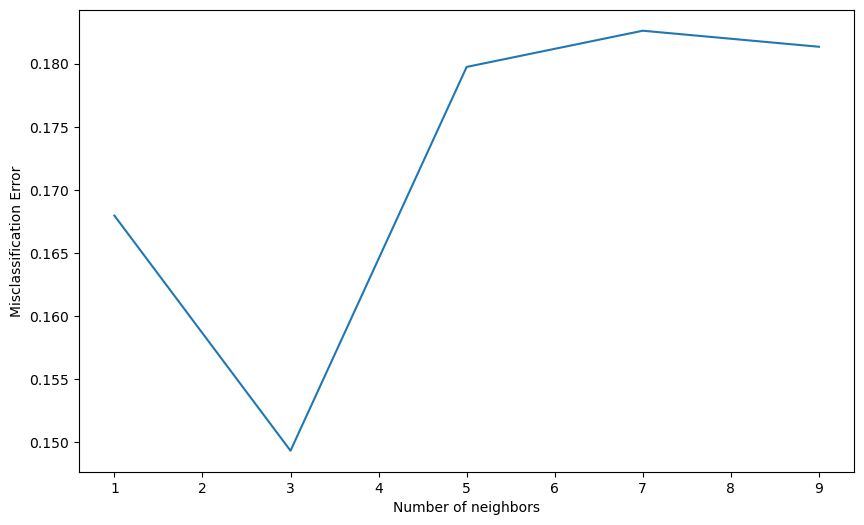

In [ ]:
MSE = [1-x for x in cv_scores] 
  
# determining the best k 
optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
  
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#using optimal k 3
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
classifier.score(X_test, y_test) 

0.9995435553526912

In [ ]:
#y_pred = classifier.predict(X_test)

with k =3 the performance decreases hence using 5

# Q4) Evaluate the model performance using a classification report and accuracy score 

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print(ac)

[[56860     4]
 [   22    76]]
0.9995435553526912


In [ ]:
# define normalized confusion matrix
confusion_matrix_norm = confusion_matrix(y_test, y_pred, normalize="all")

print(confusion_matrix_norm)

[[9.98209333e-01 7.02222534e-05]
 [3.86222394e-04 1.33422282e-03]]


In [ ]:
# compute accuracy using sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9995435553526912


In [ ]:
# compute precision using sklearn.metrics
precision = precision_score(y_test, y_pred)

print("Precision:", precision)

# compute recall using sklearn.metrics
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

Precision: 0.95
Recall: 0.7755102040816326


In [ ]:
# compute F1 score using sklearn.metrics
F1 = f1_score(y_test, y_pred,)

print("F1 Score:", F1)

F1 Score: 0.8539325842696629


In [ ]:
from sklearn.metrics import classification_report


target_names = ['Class Not fraud', 'Class fraud']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Class Not fraud       1.00      1.00      1.00     56864
    Class fraud       0.95      0.78      0.85        98

       accuracy                           1.00     56962
      macro avg       0.97      0.89      0.93     56962
   weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Fbeta
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

0.9090909090909091

# Q5) Plot a confusion matrix as a heatmap, offering a visual representation of the model's performance, illustrating True Positives, True Negatives, False Positives, and False Negatives.

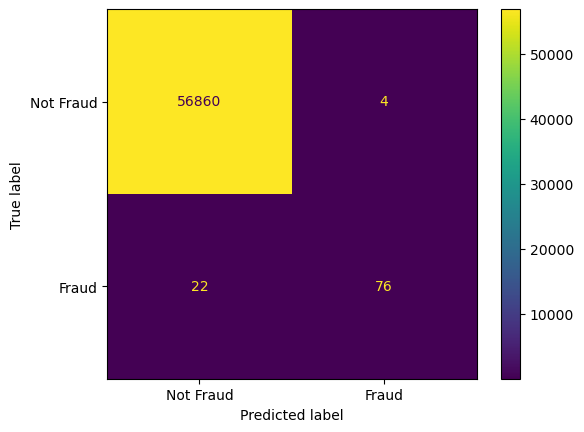

In [ ]:
# visualize confusion matrix with sklearn metrics
# define matrix and create labels

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ["Not Fraud", "Fraud"])

# display matrix
cm_display.plot()
plt.show()

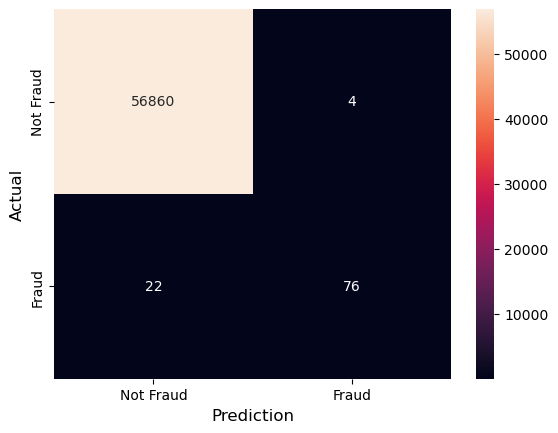

In [ ]:
# define and print matrix with labels
import seaborn as sns
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not Fraud','Fraud'],
            yticklabels=['Not Fraud','Fraud'])

# display matrix
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()

In [ ]:
'''import six
import sys
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six'] = six
from costcla.models import CostSensitiveLogisticRegression
from costcla.metrics import savings_score
X_train, X_test, y_train, y_test, cost_mat_train, cost_mat_test = train_test_split(X.drop(['Amount'],axis=1), y, X['Amount'], test_size=0.2, random_state=0)
f = CostSensitiveLogisticRegression()
f.fit(X_train, y_train,cost_mat_train)
y_pred_test_cslr = f.predict(X_test)
# Savings using Logistic Regression
print(savings_score(y_test, y_pred, cost_mat_test))
# Savings using Cost Sensitive Logistic Regression
print(savings_score(y_test, y_pred_test_cslr, cost_mat_test))'''

"import six\nimport sys\nfrom sklearn.model_selection import train_test_split\nsys.modules['sklearn.externals.six'] = six\nfrom costcla.models import CostSensitiveLogisticRegression\nfrom costcla.metrics import savings_score\nX_train, X_test, y_train, y_test, cost_mat_train, cost_mat_test = train_test_split(X.drop(['Amount'],axis=1), y, X['Amount'], test_size=0.2, random_state=0)\nf = CostSensitiveLogisticRegression()\nf.fit(X_train, y_train,cost_mat_train)\ny_pred_test_cslr = f.predict(X_test)\n# Savings using Logistic Regression\nprint(savings_score(y_test, y_pred, cost_mat_test))\n# Savings using Cost Sensitive Logistic Regression\nprint(savings_score(y_test, y_pred_test_cslr, cost_mat_test))"

# Q6) Write some conclusion on how K-Nearest Neighbors implementation serves as an efficient solution for credit card fraud detection

This model is good and simple in predicting  non fruad transactionwith 100% in precision,recall and F! score. But even though the fraud detection is good enough its not acceptable given the high financialimpact in missinga fraud transaction. hence methods like CostSensitiveLogisticRegression can be considered for greater presion in detecting fraud transaction.
Even though the model was well performing and simple, it eeds improvement in terms of fraud dection percentage.